## 安装对应包

In [1]:
!pip install opencv-python pillow -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [13]:
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf

--2024-03-18 10:22:48--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf
Resolving zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)... 121.36.235.132
Connecting to zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)|121.36.235.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10050868 (9.6M) [application/x-font-ttf]
Saving to: ‘SimHei.ttf’

SimHei.ttf          100%[===================>]   9.58M  1.08MB/s    in 17s     

2024-03-18 10:23:05 (585 KB/s) - ‘SimHei.ttf’ saved [10050868/10050868]



In [14]:
import os

## 下载数据集fruit30

In [15]:
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/fruit30/fruit30_split.zip

--2024-03-18 10:24:11--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/fruit30/fruit30_split.zip
Resolving zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)... 121.36.235.132
Connecting to zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)|121.36.235.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 226278151 (216M) [application/zip]
Saving to: ‘fruit30_split.zip’

fruit30_split.zip   100%[===================>] 215.79M  1.20MB/s    in 2m 54s  

2024-03-18 10:27:06 (1.24 MB/s) - ‘fruit30_split.zip’ saved [226278151/226278151]



In [16]:
!unzip fruit30_split.zip

Archive:  fruit30_split.zip
   creating: fruit30_split/
   creating: fruit30_split/train/
   creating: fruit30_split/train/苦瓜/
  inflating: fruit30_split/train/苦瓜/195.jpg  
  inflating: fruit30_split/train/苦瓜/139.jpg  
  inflating: fruit30_split/train/苦瓜/2.jpg  
  inflating: fruit30_split/train/苦瓜/25.jpg  
  inflating: fruit30_split/train/苦瓜/8.jpg  
  inflating: fruit30_split/train/苦瓜/127.jpeg  
  inflating: fruit30_split/train/苦瓜/165.jpg  
  inflating: fruit30_split/train/苦瓜/67.jpeg  
  inflating: fruit30_split/train/苦瓜/75.jpg  
  inflating: fruit30_split/train/苦瓜/30.jpg  
  inflating: fruit30_split/train/苦瓜/164.jpg  
  inflating: fruit30_split/train/苦瓜/47.jpg  
  inflating: fruit30_split/train/苦瓜/199.jpg  
  inflating: fruit30_split/train/苦瓜/37.jpg  
  inflating: fruit30_split/train/苦瓜/113.jpg  
  inflating: fruit30_split/train/苦瓜/130.jpg  
  inflating: fruit30_split/train/苦瓜/11.jpg  
  inflating: fruit30_split/train/苦瓜/82.jpg  
  inflating: fruit30_split/train/苦瓜/79.jpg  
  inflatin

In [17]:
!rm fruit30_split.zip

## 导入工具包

In [3]:
import os

import numpy as np
from tqdm import tqdm

import torch
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt
%matplotlib inline

# 忽略烦人的红色提示
import warnings
warnings.filterwarnings("ignore")

In [4]:
## GPU or CPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('device', device)

device cpu


## 图像预处理

In [5]:
from torchvision import transforms

train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], 
                         [0.229, 0.224, 0.225])
])

test_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], 
                         [0.229, 0.224, 0.225])
])

## 载入数据集

In [6]:
# 数据集文件夹路径
dataset_dir = 'fruit30_split'

In [7]:
train_path = os.path.join(dataset_dir, 'train')
test_path = os.path.join(dataset_dir, 'val')
print('训练集路径', train_path)
print('测试集路径', test_path)

训练集路径 fruit30_split/train
测试集路径 fruit30_split/val


In [8]:
from torchvision import datasets

# 载入训练集
train_dataset = datasets.ImageFolder(train_path, train_transform)

# 载入测试集
test_dataset = datasets.ImageFolder(test_path, test_transform)

In [9]:
print('训练集图像数量', len(train_dataset))
print('类别个数', len(train_dataset.classes))
print('各类别名称', train_dataset.classes)

训练集图像数量 4375
类别个数 30
各类别名称 ['哈密瓜', '圣女果', '山竹', '杨梅', '柚子', '柠檬', '桂圆', '梨', '椰子', '榴莲', '火龙果', '猕猴桃', '石榴', '砂糖橘', '胡萝卜', '脐橙', '芒果', '苦瓜', '苹果-红', '苹果-青', '草莓', '荔枝', '菠萝', '葡萄-白', '葡萄-红', '西瓜', '西红柿', '车厘子', '香蕉', '黄瓜']


In [10]:
print('测试集图像数量', len(test_dataset))
print('类别个数', len(test_dataset.classes))
print('各类别名称', test_dataset.classes)

测试集图像数量 1078
类别个数 30
各类别名称 ['哈密瓜', '圣女果', '山竹', '杨梅', '柚子', '柠檬', '桂圆', '梨', '椰子', '榴莲', '火龙果', '猕猴桃', '石榴', '砂糖橘', '胡萝卜', '脐橙', '芒果', '苦瓜', '苹果-红', '苹果-青', '草莓', '荔枝', '菠萝', '葡萄-白', '葡萄-红', '西瓜', '西红柿', '车厘子', '香蕉', '黄瓜']


## 类别和索引号 一一对应

In [11]:
# 各类别名称
class_names = train_dataset.classes
n_class = len(class_names)

In [12]:
class_names

['哈密瓜',
 '圣女果',
 '山竹',
 '杨梅',
 '柚子',
 '柠檬',
 '桂圆',
 '梨',
 '椰子',
 '榴莲',
 '火龙果',
 '猕猴桃',
 '石榴',
 '砂糖橘',
 '胡萝卜',
 '脐橙',
 '芒果',
 '苦瓜',
 '苹果-红',
 '苹果-青',
 '草莓',
 '荔枝',
 '菠萝',
 '葡萄-白',
 '葡萄-红',
 '西瓜',
 '西红柿',
 '车厘子',
 '香蕉',
 '黄瓜']

In [13]:
# 映射关系：类别 到 索引号
train_dataset.class_to_idx

{'哈密瓜': 0,
 '圣女果': 1,
 '山竹': 2,
 '杨梅': 3,
 '柚子': 4,
 '柠檬': 5,
 '桂圆': 6,
 '梨': 7,
 '椰子': 8,
 '榴莲': 9,
 '火龙果': 10,
 '猕猴桃': 11,
 '石榴': 12,
 '砂糖橘': 13,
 '胡萝卜': 14,
 '脐橙': 15,
 '芒果': 16,
 '苦瓜': 17,
 '苹果-红': 18,
 '苹果-青': 19,
 '草莓': 20,
 '荔枝': 21,
 '菠萝': 22,
 '葡萄-白': 23,
 '葡萄-红': 24,
 '西瓜': 25,
 '西红柿': 26,
 '车厘子': 27,
 '香蕉': 28,
 '黄瓜': 29}

In [14]:
# 映射关系：索引号 到 类别
idx_to_labels = {y:x for x,y in train_dataset.class_to_idx.items()}

In [15]:
idx_to_labels

{0: '哈密瓜',
 1: '圣女果',
 2: '山竹',
 3: '杨梅',
 4: '柚子',
 5: '柠檬',
 6: '桂圆',
 7: '梨',
 8: '椰子',
 9: '榴莲',
 10: '火龙果',
 11: '猕猴桃',
 12: '石榴',
 13: '砂糖橘',
 14: '胡萝卜',
 15: '脐橙',
 16: '芒果',
 17: '苦瓜',
 18: '苹果-红',
 19: '苹果-青',
 20: '草莓',
 21: '荔枝',
 22: '菠萝',
 23: '葡萄-白',
 24: '葡萄-红',
 25: '西瓜',
 26: '西红柿',
 27: '车厘子',
 28: '香蕉',
 29: '黄瓜'}

## 定义数据加载器DataLoader

In [16]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

# 训练集的数据加载器
train_loader = DataLoader(train_dataset,
                          batch_size=BATCH_SIZE,
                          shuffle=True,
                          num_workers=4
                         )

# 测试集的数据加载器
test_loader = DataLoader(test_dataset,
                         batch_size=BATCH_SIZE,
                         shuffle=False,
                         num_workers=4
                        )

## 查看一个batch的图像和标注

In [17]:
# DataLoader 是 python生成器，每次调用返回一个 batch 的数据
images, labels = next(iter(train_loader))

In [18]:
images.shape

torch.Size([32, 3, 224, 224])

In [19]:
labels

tensor([19,  9, 12, 10,  9, 23,  0, 12, 24,  5, 25,  7, 26, 20,  7, 24,  0,  8,
        13, 27, 19, 18, 20, 26, 28,  8, 12,  8,  4,  9, 15, 23])

## 可视化一个batch的图像和标注

In [20]:
# 将数据集中的Tensor张量转为numpy的array数据类型
images = images.numpy()

In [21]:
images[5].shape

(3, 224, 224)

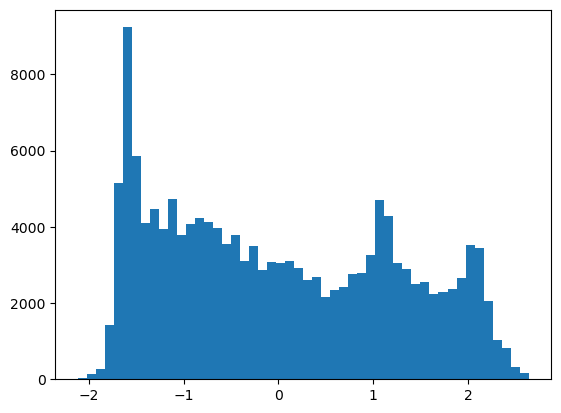

In [22]:
plt.hist(images[5].flatten(), bins=50)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'label:12')

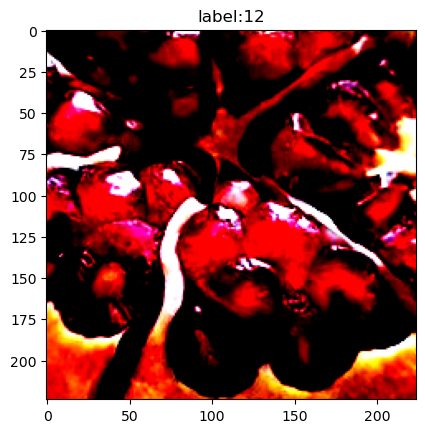

In [23]:
# batch 中经过预处理的图像
idx = 2
plt.imshow(images[idx].transpose((1,2,0))) # 转为(224, 224, 3)
plt.title('label:'+str(labels[idx].item()))

In [24]:
label = labels[idx].item()

In [25]:
label

12

In [26]:
pred_classname = idx_to_labels[label]

In [27]:
pred_classname

'石榴'

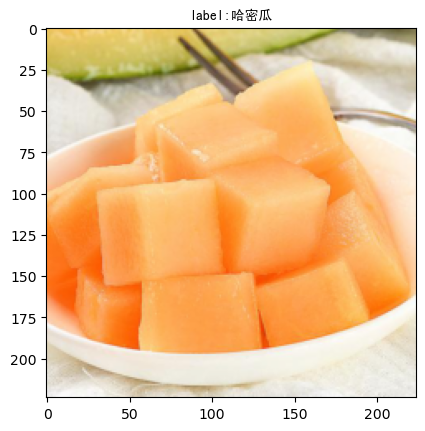

In [43]:
# 中文
import matplotlib.font_manager as fm

# 指定字体路径
font_path = './SimHei.ttf'

# 注册字体
prop = fm.FontProperties(fname=font_path)

# 原始图像
idx = 2
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
plt.imshow(np.clip(images[idx].transpose((1,2,0)) * std + mean, 0, 1))
plt.title('label:'+ pred_classname, fontproperties=prop)
plt.show()

## 导入训练需要的包

In [44]:
from torchvision import models
import torch.optim as optim

## 迁移学习
- 微调网络的最后一层

In [45]:
model = models.resnet18(pretrained=True) # 载入预训练模型

# 修改全连接层，使得全连接层的输出与当前数据集类别数对应
# 新建的层默认 requires_grad=True
model.fc = nn.Linear(model.fc.in_features, n_class)

In [46]:
model.fc

Linear(in_features=512, out_features=30, bias=True)

In [48]:
# 只微调训练最后一层全连接层的参数，其它层冻结
optimizer = optim.Adam(model.fc.parameters())

## 训练配置

In [49]:
model = model.to(device)

# 交叉熵损失函数
criterion = nn.CrossEntropyLoss() 

# 训练轮次 Epoch
EPOCHS = 20

In [50]:
# 获得一个 batch 的数据和标注
images, labels = next(iter(train_loader))
images = images.to(device)
labels = labels.to(device)

In [51]:
# 输入模型，执行前向预测
outputs = model(images)

In [52]:
# 获得当前 batch 所有图像的预测类别 logit 分数
outputs.shape

torch.Size([32, 30])

In [53]:
# 由 logit，计算当前 batch 中，每个样本的平均交叉熵损失函数值
loss = criterion(outputs, labels)

In [54]:
# 反向传播“三部曲”
optimizer.zero_grad() # 清除梯度
loss.backward() # 反向传播
optimizer.step() # 优化更新

In [55]:
# 获得当前 batch 所有图像的预测类别
_, preds = torch.max(outputs, 1)

In [56]:
preds

tensor([20, 26, 12, 26, 20, 29, 20, 26, 28,  2, 26, 12, 28, 29, 20,  5, 20, 26,
        26, 10, 26, 28, 29, 20, 20, 26, 20, 12, 19, 26, 29, 22])

In [57]:
labels

tensor([ 0, 12,  8, 27,  9, 15,  7, 24,  0, 24, 17, 15, 18, 28, 27,  0,  8,  2,
         2,  6, 18,  1,  0, 19,  7, 17, 13, 16,  9, 18,  3,  6])

## 训练

In [ ]:
# 遍历每个 EPOCH
for epoch in tqdm(range(EPOCHS)):

    model.train()

    for images, labels in train_loader:  # 获取训练集的一个 batch，包含数据和标注
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)           # 前向预测，获得当前 batch 的预测结果
        loss = criterion(outputs, labels) # 比较预测结果和标注，计算当前 batch 的交叉熵损失函数
        
        optimizer.zero_grad()
        loss.backward()                   # 损失函数对神经网络权重反向传播求梯度
        optimizer.step()                  # 优化更新神经网络权重

  0%|                                                                                            | 0/20 [00:00<?, ?it/s]